In [49]:
#Question 1: Implement KNN classification, using the sklearn package.

%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.datasets import load_iris

In [50]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [51]:
n_neighbors = range(1, 150)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [54]:
knn = KNeighborsClassifier(3).fit(X_train,y_train)

In [55]:
knn.score(X_test, y_test)

0.93333333333333335

In [56]:
#Question 2: Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for your cross-validation.

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import scale

from sklearn.datasets import load_iris
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

In [60]:
print scores
print scores.mean()

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98


In [61]:
y_test.shape
print clf.score(X_test, y_test)

0.977777777778


In [69]:
#Question 3: Use your KNN classifier and cross-validation code from (1) and (2) above to determine the optimal value of K (number of nearest neighbors to consult) for this Iris dataset. Hint: This hyperparameter will be a number between 1 and 150

n_neighbors = range(1, len(X_train))

In [70]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

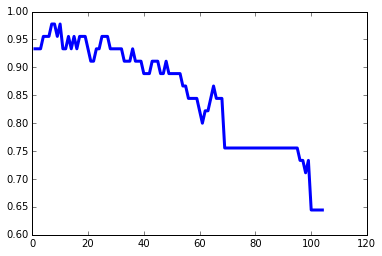

In [71]:
plt.plot(n_neighbors, scores, linewidth=3.0)

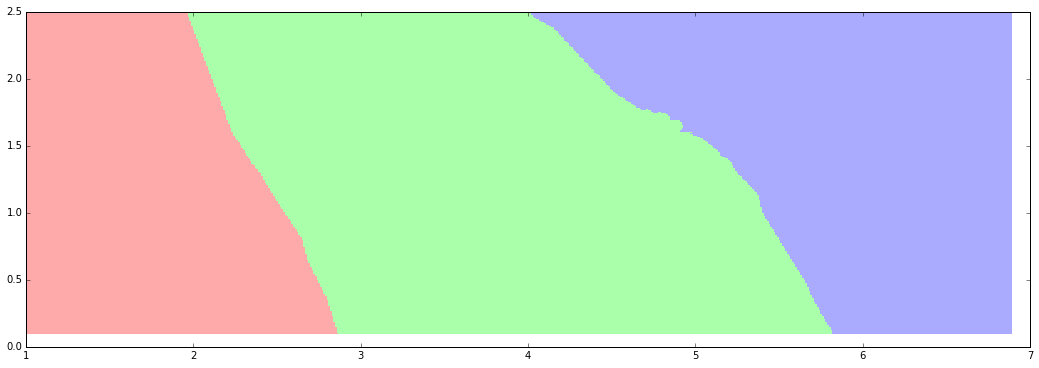

In [20]:
#Question 4: Using matplotlib, plot classifier accuracy versus the hyperparameter K for a range of K that you consider interesting. Explain in words what you are seeing.

clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data[:, 2:4], iris.target)


h = 0.01

# Creating color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plotting the decision boundary.
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Putting the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [72]:
#Question 5: Now, write your own implementation of cross-validation in Python without using the cross-validation methods from sklearn.
#Cross validation is a very important concept.
#Implementing it yourself in Python is the best way to learn and understand it.
#Compare the results of your cross-validation code with your results using the cross-validation in sklearn.

def k_fold_cross_validation(X, K, randomise = False):
    
#Generates K (training, testing) sets from the items in X.
#Each set is a subset of X, with repeated validation on length len(X)/K.
#So each validation is of length (K-1)*len(X)/K.

#If randomise = True, a copy of X is shuffled before partitioning.
#If randomise = False, the set is preserved in training and validation.

    if randomise: from random import shuffle; X=list(X); shuffle(X)
    for k in xrange(K):
        training = [x for i, x in enumerate(X) if i % K != k]
        testing = [x for i, x in enumerate(X) if i % K == k]
        yield training, testing
 
X = [i for i in xrange(97)]
for training, testing in k_fold_cross_validation(X, K=5):
    for x in X: assert (x in training) ^ (x in testing), x

In [73]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [74]:
clf = neighbors.KNeighborsClassifier(11, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

In [75]:
print scores
print scores.mean()

[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98
